In [95]:
import sys
sys.path.append("../")
sys.path.append("./")
from utils import *
#from threed_gaussian import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

In [165]:
vals = np.linspace(-5, 5, 7)
xx, yy = np.meshgrid(vals, vals)
# z = multivariate_normal(mean=np.zeros(3), cov=np.eye(3))\
#     .pdf(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])\
#     .reshape(len(vals)//3, 3)
    
# tmp = multivariate_normal(mean=np.zeros(3), cov=np.eye(3))\
#     .pdf(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
        
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# z = [[
#     [0,0,0],
#     [1,1,1],
#     [2,2,2]
# ]]

# for l in z:
#     for x_y_z in l:
#         ax.scatter(x_y_z[0], x_y_z[1], x_y_z[2], s=10)#, marker='.', depthshade=False)


# for l in z:
#     print(l)
z = multivariate_normal(mean=np.zeros(2), cov=np.eye(2))\
        .pdf(np.c_[xx.ravel(), yy.ravel()])\
        .reshape(len(vals), len(vals))
                   
v = np.c_[xx.ravel(), yy.ravel()]
print(z)

[[2.21033492e-12 2.29293628e-09 1.47894604e-07 5.93115274e-07
  1.47894604e-07 2.29293628e-09 2.21033492e-12]
 [2.29293628e-09 2.37862450e-06 1.53421502e-04 6.15280300e-04
  1.53421502e-04 2.37862450e-06 2.29293628e-09]
 [1.47894604e-07 1.53421502e-04 9.89570114e-03 3.96856366e-02
  9.89570114e-03 1.53421502e-04 1.47894604e-07]
 [5.93115274e-07 6.15280300e-04 3.96856366e-02 1.59154943e-01
  3.96856366e-02 6.15280300e-04 5.93115274e-07]
 [1.47894604e-07 1.53421502e-04 9.89570114e-03 3.96856366e-02
  9.89570114e-03 1.53421502e-04 1.47894604e-07]
 [2.29293628e-09 2.37862450e-06 1.53421502e-04 6.15280300e-04
  1.53421502e-04 2.37862450e-06 2.29293628e-09]
 [2.21033492e-12 2.29293628e-09 1.47894604e-07 5.93115274e-07
  1.47894604e-07 2.29293628e-09 2.21033492e-12]]


In [124]:
vals = np.linspace(-5, 5, 300)
# print(vals.reshape(100,3))
xx, yy, zz = np.meshgrid(vals,vals, vals)
print(xx.shape)

300


In [150]:
def printCords(lst):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for pt in lst:
        ax.scatter(pt[0], pt[1], pt[2], s=10)#, marker='.', depthshade=False)

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

Text(0.5, 0, 'z')

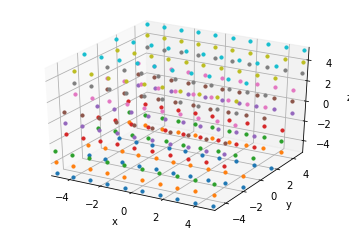

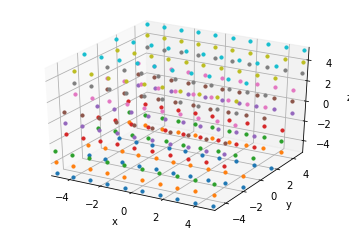

In [153]:
vals = np.linspace(-5, 5, 10)
def cartesian_product(vec1,vec2,vec3):
    l = len(vec1)+len(vec2)+len(vec3)
    a = np.repeat(vec1, l)
    b = np.tile(np.repeat(vec2,3), len(vec2))
    c = np.tile(vec3, l)
    return np.transpose(np.array([a,b,c]))

cordList = cartesian_product(vals, vals, vals)
printCords(cordList)




In [156]:
print(cordList.shape)
z = multivariate_normal(mean=np.zeros(3), cov=np.eye(3)).pdf(cordList)

print(z.shape)



(300, 3)
(300,)


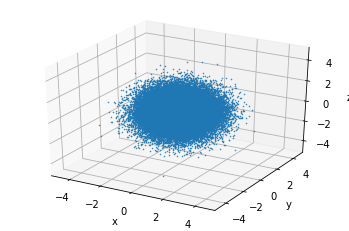

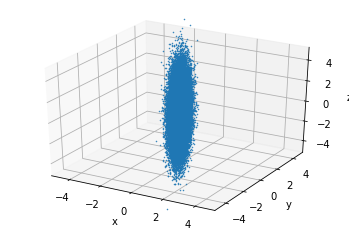

In [186]:
from threed_gaussian import *
plot_3d(x_y_z)
S = np.diag([0.1,1/2,2])
new_xyz = [[],[],[]]
for i in range(x_y_z.shape[1]):
    vec = np.array([
        x_y_z[0][i],
        x_y_z[1][i],
        x_y_z[2][i]
    ])
    tmp = S@vec.T
    new_xyz[0].append(tmp[0])
    new_xyz[1].append(tmp[1])
    new_xyz[2].append(tmp[2])

plot_3d(new_xyz)

# v0 = S@np.array([1,0,0])
# v1 = S@np.array([0,1,0])
# v2 = S@np.array([0,0,1])
# print(v0)
# print(v1)
# print(v2)

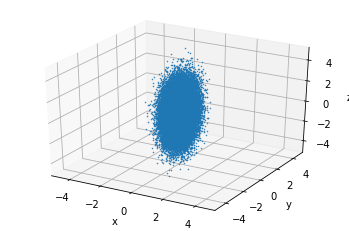

In [193]:
tmp = np.array(new_xyz)
mean = [ 
    np.mean(tmp[0]),
    np.mean(tmp[1]),
    np.mean(tmp[2])
]
# mean = [0, 0, 0]
cov = S
x_y_z1 = np.random.multivariate_normal(mean, cov, 50000).T
plot_3d(x_y_z1)